Tin Dizdarevic 

UCID: 31509390

ENGR 301 - Laboratory 5

Topic: Biomedical engineering


In [1]:
from google.colab import drive, files
drive.mount('/content/drive/')

Mounted at /content/drive/


# Part 1 - Exploratory Data Analysis and Baseline Models


## 1.1

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("drive/My Drive/Colab Notebooks/ENGR 301/Lab 5/gene_expression_patients.csv", header=0)
df.head()

,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),AFFX-BioB-M_st (endogenous control),AFFX-BioB-3_st (endogenous control),AFFX-BioC-5_st (endogenous control),AFFX-BioC-3_st (endogenous control),AFFX-BioDn-5_st (endogenous control),AFFX-BioDn-3_st (endogenous control),AFFX-CreX-5_st (endogenous control),AFFX-CreX-3_st (endogenous control),hum_alu_at (miscellaneous control),AFFX-DapX-5_at (endogenous control),AFFX-DapX-M_at (endogenous control),AFFX-DapX-3_at (endogenous control),AFFX-LysX-5_at (endogenous control),AFFX-LysX-M_at (endogenous control),AFFX-LysX-3_at (endogenous control),AFFX-PheX-5_at (endogenous control),AFFX-PheX-M_at (endogenous control),AFFX-PheX-3_at (endogenous control),AFFX-ThrX-5_at (endogenous control),AFFX-ThrX-M_at (endogenous control),AFFX-ThrX-3_at (endogenous control),AFFX-TrpnX-5_at (endogenous control),AFFX-TrpnX-M_at (endogenous control),AFFX-TrpnX-3_at (endogenous control),AFFX-HUMISGF3A/M97935_5_at (endogenous control),AFFX-HUMISGF3A/M97935_MA_at (endogenous control),AFFX-HUMISGF3A/M97935_MB_at (endogenous control),AFFX-HUMISGF3A/M97935_3_at (endogenous control),AFFX-HUMRGE/M10098_5_at (endogenous control),AFFX-HUMRGE/M10098_M_at (endogenous control),...,GB DEF = Glutamate dehydrogenase,PRSS3 Protease; serine; 3 (trypsin 3),GB DEF = Transmembrane protein Tmp21-IIex,GB DEF = H2B/h gene,ACTB Actin; beta.1,GAPD Glyceraldehyde-3-phosphate dehydrogenase.3,CYTOCHROME P450 IA2,Nkat2b mRNA,Natural killer cell receptor (KIR) mRNA,Major Histocompatibility Complex; Class I; C (Gb:X58536),HLA-A MHC class I protein HLA-A (HLA-A28;-B40; -Cw3).1,PRB2 locus salivary proline-rich protein mRNA; clone cP7,HLA CLASS II HISTOCOMPATIBILITY ANTIGEN; DQ(W1.1) BETA CHAIN PRECURSOR,GB DEF = (HLCC85) mRNA for voltage-dependent L-type Ca channel alpha 1 subunit (splice variant),GB DEF = Endogenous retrovirus clone P1.8 polymerase mRNA; partial cds,Integrase gene extracted from Human endogenous retrovirus H clone g10.34 integrase and putative envelope protein genes; partial cds,WUGSC:GS345D13.2 gene (G-protein gamma-1 subunit) extracted from Human BAC clone GS345D13 from 7q31-q32,TIAL1 TIA1 cytotoxic granule-associated RNA-binding protein-like 1.1,Ras-Specific Guanine Nucleotide-Releasing Factor,TYROSINE-PROTEIN KINASE ITK/TSK.1,(clone p4) 50 kD dystrophin-associated glycoprotein mRNA,Ifp35 gene extracted from Human BRCA1; Rho7 and vatI genes; and ipf35 gene; partial cds,INHA Inhibin; alpha,S100A9 S100 calcium-binding protein A9 (calgranulin B),PLGL Plasminogen-like protein,ID1 Inhibitor of DNA binding 1; dominant negative helix-loop-helix protein,ABP1 Amiloride binding protein 1 (amine oxidase (copper-containing)).1,Transcriptional activator hSNF2b.1,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein kinase II delta E mRNA; partial cds,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypeptide 1,PTGER3 Prostaglandin E receptor 3 (subtype EP3) {alternative products}.2,HMG2 High-mobility group (nonhistone chromosomal) protein 2.1,RB1 Retinoblastoma 1 (including osteosarcoma).1,GB DEF = Glycophorin Sta (type A) exons 3 and 4; partial,GB DEF = mRNA (clone 1A7),patient,cancer type
0,-214,-153,-58,88,-295,-558,199,-176,252,206,-41,-831,-653,-462,75,381,-118,-565,15091,7,311,-231,21,-107,165,-78,-204,29,-61,-105,-366,-41,-346,-297,-109,-13,215,797,14538,9738,...,172,149,341,788,21210,13771,598,396,245,14476,10882,701,2762,-325,-67,346,-68,229,-14,108,28,349,61,273,384,-306,-1827,1582,185,511,-125,389,-37,793,329,36,191,-37,1,ALL
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,19,-743,-239,-83,182,164,-141,-423,11038,37,134,-161,-21,-180,18

## 1.2 
There are 47 patients who are classified as ALL and 25 patients who are classified as AML. The output is a bit unbalanced, but not highly.

In [ ]:
df["cancer type"].value_counts()

ALL    47
AML    25
Name: cancer type, dtype: int64

## 1.3

Scaling is very important in machine learning because we have to bring all the features in the same standing. The reasin for this is because we don't want one spaciffical number imacting the mmodel just because it has a large magnitude. In case of our dataset, max, min and mean are quite far apart. 

This is the problem and scaling data has to be considered. Since many machine algorithms calculate the distances between data, the feature with higher value range starts dominating when calculating the distances. 


In [ ]:
df.max(axis=1)

0     31086
1     29288
2     28056
3     31449
4     29543
      ...  
67    29374
68    26073
69    39827
70    28409
71    32358
Length: 72, dtype: int64

In [ ]:
df.min(axis=1)

0    -19826
1    -17930
2    -27182
3    -23396
4    -10339
      ...  
67   -12527
68   -10279
69   -11535
70   -10873
71    -8646
Length: 72, dtype: int64

In [ ]:
df.mean(axis=1)

0     641.277279
1     690.149790
2     698.210379
3     600.901543
4     679.438289
         ...    
67    734.839972
68    744.291865
69    520.150210
70    574.984292
71    617.177980
Length: 72, dtype: float64

## 1.4

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


## 1.5


### a)

In [ ]:
encoder = LabelEncoder()
x1 = np.array(df.drop(["cancer type","patient"], axis = 1))
y1 = np.array(encoder.fit_transform(df["cancer type"]))


### b)

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3)

### c)

In [ ]:
from sklearn.linear_model import LogisticRegression


lrModel = LogisticRegression()
lrModel.fit(x_train1, y_train1)

y_predict1 = lrModel.predict(x_test1)


Accuracy:  0.9545454545454546


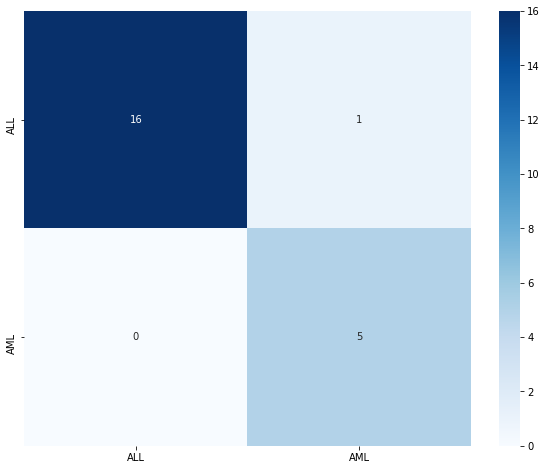

In [ ]:
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_true=y_test1, y_pred=y_predict1)
categories = encoder.classes_.tolist()
plt.figure(figsize=(10,8))
ax = sns.heatmap(cf_matrix,
                 annot=True,
                 fmt='g',
                 cmap='Blues',
                 xticklabels=categories,
                 yticklabels=categories)
print("Accuracy: ", metrics.accuracy_score(y_test1, y_predict1))

### d)

In [ ]:
from sklearn.naive_bayes import GaussianNB
NBModel = GaussianNB()
NBModel.fit(x_train1,y_train1)

y_predict2 = NBModel.predict(x_test1)

Accuracy:  1.0


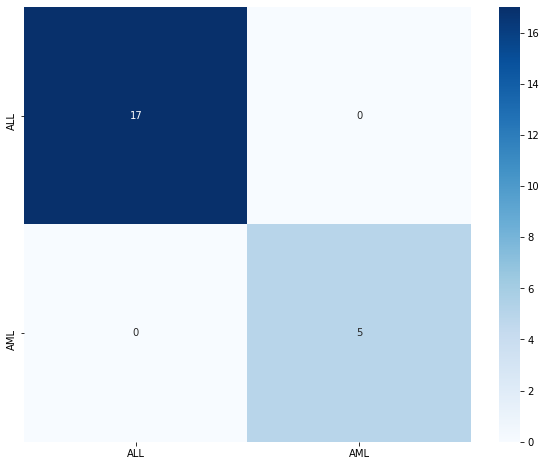

In [ ]:
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_true=y_test1, y_pred=y_predict2)
categories = encoder.classes_.tolist()
plt.figure(figsize=(10,8))
ax = sns.heatmap(cf_matrix,
                 annot=True,
                 fmt='g',
                 cmap='Blues',
                 xticklabels=categories,
                 yticklabels=categories)
print("Accuracy: ", metrics.accuracy_score(y_test1, y_predict2))

### e)
Both models performed very well, but the smmount of measurments is very small and therfore we might be vastly overfitting our models. We cannot sure that this model will generalize to a large number of new patients.

# Part 2 - Scaling and Feature Reduction

## 2.1

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_scaled = scaler.fit_transform(x1)
printx_scaled.mean()

-4.542222595721756e-19

In [ ]:
x_scaled.std()

1.0

## 2.2
The small script I wrote below goes through the array and finds the needed explained variance. Given the script, there we need 51 components to get over the 90% of the variance. 

In [ ]:
from sklearn.decomposition import PCA

def findComponent(explained_variance, variance):
  for i in range(explained_variance.size):
    if (explained_variance[i]>variance):
      return i + 1
     
    
pca = PCA(n_components=51)

x_scaled_pca = pca.fit_transform(x_scaled)

comp = findComponent(pca.explained_variance_ratio_.cumsum(), 0.9)
print(comp)

51


## 2.3

Since we have a very small number of observations, this model is very hard to fit, and sometimes model behaves better than the previous one, but it also behaves worse in some cases. The first model I fitted, already had a very good accuracy, and this models behave worse in some cases, but I believe they might have a better generalization because data is scaled. Unfortunately, reducing the data in this case might not be the best option given the number of observations, so this is something that has to be considered. Also, y-values are not equally distributed, which is the next step in our model developement. 

In [ ]:
y2 = np.array(encoder.fit_transform(df["cancer type"]))
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_scaled_pca, y2, test_size=0.3)

In [ ]:
scaled_lrModel = LogisticRegression()
scaled_lrModel.fit(x_train2, y_train2)

y_predict2 = scaled_lrModel.predict(x_test2)

Accuracy:  0.9545454545454546


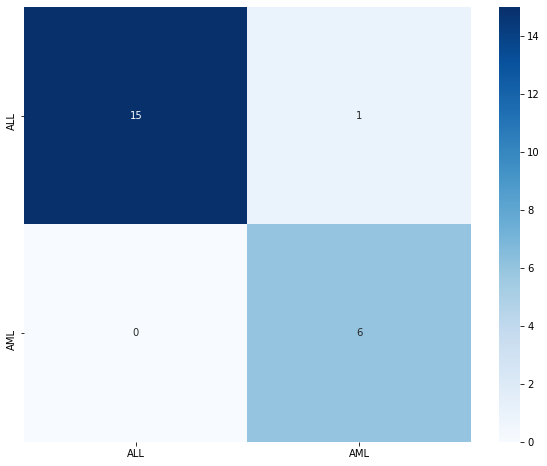

In [ ]:
cf_matrix = metrics.confusion_matrix(y_true=y_test2, y_pred=y_predict2)
categories = encoder.classes_.tolist()
plt.figure(figsize=(10,8))
ax = sns.heatmap(cf_matrix,
                 annot=True,
                 fmt='g',
                 cmap='Blues',
                 xticklabels=categories,
                 yticklabels=categories)
print("Accuracy: ", metrics.accuracy_score(y_test2, y_predict2))

In [ ]:
pca_NBModel = GaussianNB()
pca_NBModel.fit(x_train2,y_train2)

y_predict3 = pca_NBModel.predict(x_test2)

Accuracy:  0.7272727272727273


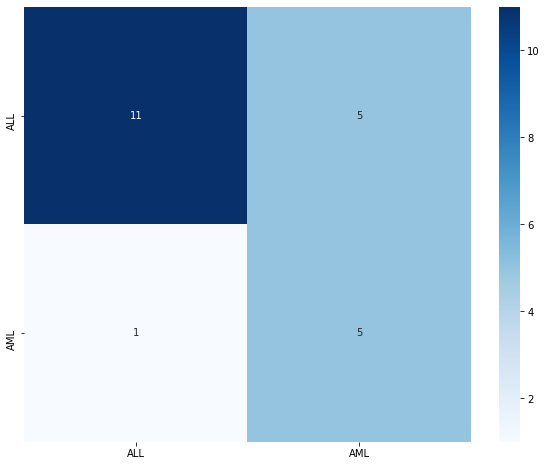

In [ ]:
cf_matrix = metrics.confusion_matrix(y_true=y_test2, y_pred=y_predict3)
categories = encoder.classes_.tolist()
plt.figure(figsize=(10,8))
ax = sns.heatmap(cf_matrix,
                 annot=True,
                 fmt='g',
                 cmap='Blues',
                 xticklabels=categories,
                 yticklabels=categories)
print("Accuracy: ", metrics.accuracy_score(y_test2, y_predict3))

# Part 3 - Class Balancing 

## 3.1 
y data is equally distributed in this case.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


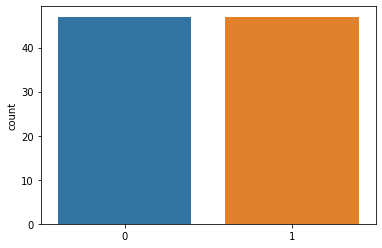

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_bal, y_bal = smote.fit_resample(x_scaled_pca, y2)

sns.countplot(y_bal)

## 3.2

These models behave very well. We solved some of the issues that arised by using SMOTE and these models are definately more generalizable to new patients. We used the modified data from the previous question, but we also used SMOTE to get rid of any imbalance in the data, which improved the results, as it can be seen in the matrices below.  

In [ ]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_bal, y_bal, test_size=0.3)

In [ ]:
smote_lrModel = LogisticRegression()
smote_lrModel.fit(x_train3, y_train3)
y_smotelr_predict = smote_lrModel.predict(x_test3)

Accuracy:  0.9655172413793104


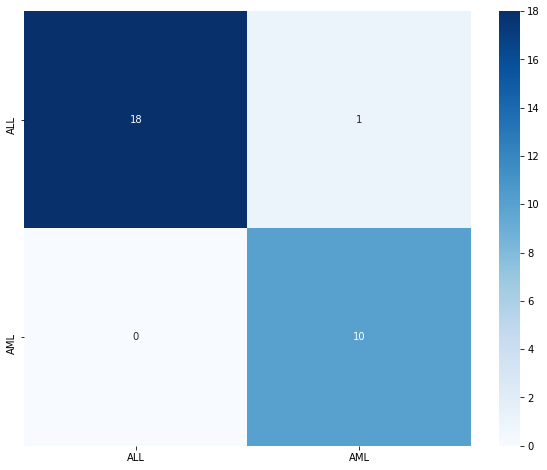

In [ ]:
cf_matrix = metrics.confusion_matrix(y_true=y_test3, y_pred=y_smotelr_predict)
categories = encoder.classes_.tolist()
plt.figure(figsize=(10,8))
ax = sns.heatmap(cf_matrix,
                 annot=True,
                 fmt='g',
                 cmap='Blues',
                 xticklabels=categories,
                 yticklabels=categories)
print("Accuracy: ", metrics.accuracy_score(y_test3, y_smotelr_predict))

In [ ]:
smote_NBModel = GaussianNB()
smote_NBModel.fit(x_train3,y_train3)
y_smotenb_predict = pca_NBModel.predict(x_test3)

Accuracy:  0.896551724137931


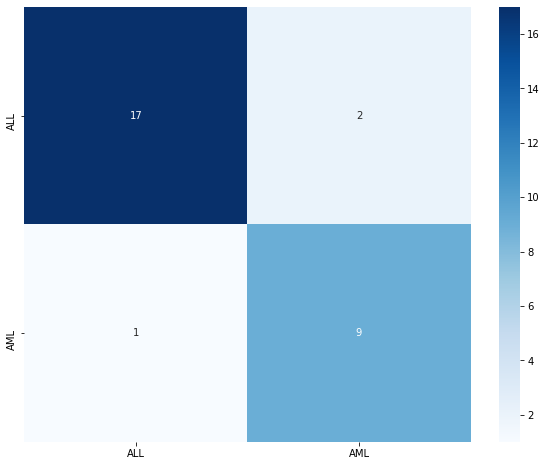

In [ ]:
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_true=y_test3, y_pred=y_smotenb_predict)
categories = encoder.classes_.tolist()
plt.figure(figsize=(10,8))
ax = sns.heatmap(cf_matrix,
                 annot=True,
                 fmt='g',
                 cmap='Blues',
                 xticklabels=categories,
                 yticklabels=categories)
print("Accuracy: ", metrics.accuracy_score(y_test3, y_smotenb_predict))